In [2]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

seed=29501730

## 1-B Modelo de clasificación de Operadores

### Preprocesamiento Transformación de Datos

### Preprocesamiento Transformación de Datos

In [3]:
!git clone https://github.com/HandlessCoder/Dataset_Operadores_28x28.git
%cd Dataset_Operadores_28x28/
!git checkout prueba


c:\Users\joine\OneDrive\UCV2\SEMESTRE 2-2024\ML\Tareas\Tarea #2\ml-tarea2B-knn-svm\src\notebooks\Dataset_Operadores_28x28


Cloning into 'Dataset_Operadores_28x28'...
c:\Users\joine\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


branch 'prueba' set up to track 'origin/prueba'.


Switched to a new branch 'prueba'


In [4]:


# Función para cargar imágenes
def load_images(root, label):
    images = []
    labels = []

    for filename in os.listdir(root):
        img = Image.open(os.path.join(root, filename)).convert("L")
        img = img.resize((28, 28))  # Redimensionar las imágenes a 28x28 píxeles
        img_np = np.array(img)  # Convertir la imagen a un arreglo de NumPy
        images.append(img_np)
        labels.append(label)
    return np.array(images), np.array(labels)

# Definir la ruta donde están las imágenes de operadores
root = ""

# Cargar las imágenes y etiquetas para cada operador
img_suma, label_suma = load_images(root + "Suma", ord('+'))  # Suma
img_resta, label_resta = load_images(root + "Resta", ord('-'))  # Resta
img_div1, label_div1 = load_images(root + "Division1", ord('/'))  # División1 -> /
img_div2, label_div2 = load_images(root + "Division2", ord('÷'))  # División2 -> ÷
img_mult1, label_mult1 = load_images(root + "Multiplicacion1", ord('*'))  # Multiplicación1 -> *
img_mult2, label_mult2 = load_images(root + "Multiplicacion2", ord('×'))  # Multiplicación2 -> ×

# Combinar todas las imágenes y etiquetas
all_images = np.concatenate([img_suma, img_resta, img_div1, img_div2, img_mult1, img_mult2])
all_labels = np.concatenate([label_suma, label_resta, label_div1, label_div2, label_mult1, label_mult2])

# Mezclar las imágenes y etiquetas usando la semilla, esto con el objetivo de dividir el dataset de manera random utilizando la cédula como parámetro
indices = np.arange(all_images.shape[0])
np.random.shuffle(indices)
all_images = all_images[indices]
all_labels = all_labels[indices]

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba), estos porcentajes de división
# son un criterio heredado de la asignatura Minería de Datos (fue el usado en regresión lineal)
trainImages, testImages, trainLabels, testLabels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=seed
)

# Redimensionar y normalizar las imágenes
trainImages = trainImages.reshape((trainImages.shape[0], 28 * 28)).astype('float32') / 255
testImages = testImages.reshape((testImages.shape[0], 28 * 28)).astype('float32') / 255

# Convertir las etiquetas a categorías
trainLabels = to_categorical(trainLabels)
testLabels = to_categorical(testLabels)

# Convertir las etiquetas de vuelta a su formato original
trainLabels = np.argmax(trainLabels, axis=1)
testLabels = np.argmax(testLabels, axis=1)

# Mostrar la forma (dimensiones) de los datos después de las operaciones realizadas
print('Forma de las imágenes de entrenamiento:', trainImages.shape)
print('Forma de las etiquetas de prueba:', trainLabels.shape)
print('Forma de las imágenes prueba:', testImages.shape)
print('Forma de las etiquetas de prueba:', testLabels.shape)


Forma de las imágenes de entrenamiento: (500, 784)
Forma de las etiquetas de prueba: (500,)
Forma de las imágenes prueba: (125, 784)
Forma de las etiquetas de prueba: (125,)


### Implementación de Modelos


#### Regresión Logística

##### Metodología

##### Código

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir el modelo y los hiperparámetros a ajustar
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search_LR = GridSearchCV(LogisticRegression(max_iter=500), param_grid_LR, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_LR.fit(trainImages, trainLabels)

# Resultados de la búsqueda de hiperparámetros
print(f"Resultados obtenidos:")
print(f"Hiperparámetros encontrados: {grid_search_LR.best_params_}\n")
print(f"Métricas del modelo:")
print(f"Accuracy: {grid_search_LR.best_score_ * 100:.2f}%")

# Evaluar el mejor modelo en el conjunto de prueba
best_model_LR = grid_search_LR.best_estimator_
lr_predictions = best_model_LR.predict(testImages)

lr_accuracy = accuracy_score(testLabels, lr_predictions)
lr_precision = precision_score(testLabels, lr_predictions, average='weighted')
lr_recall = recall_score(testLabels, lr_predictions, average='weighted')
lr_f1 = f1_score(testLabels, lr_predictions, average='weighted')

print(f"Precisión del modelo en el conjunto de prueba: {lr_accuracy * 100:.2f}%")
print(f"Precisión (Precision): {lr_precision * 100:.2f}%")
print(f"Recall: {lr_recall * 100:.2f}%")
print(f"F1 Score: {lr_f1 * 100:.2f}%")


Resultados obtenidos:
Hiperparámetros encontrados: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Métricas del modelo:
Accuracy: 90.20%
Precisión del modelo en el conjunto de prueba: 91.20%
Precisión (Precision): 91.71%
Recall: 91.20%
F1 Score: 91.15%


##### Evaluación del modelo

In [6]:
k vecinos

SyntaxError: invalid syntax (1327378259.py, line 1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir el modelo y los hiperparámetros a ajustar
param_grid_kNN = {
    'n_neighbors': [3, 5, 7, 9],  # Prueba diferentes valores de k
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search_kNN = GridSearchCV(KNeighborsClassifier(), param_grid_kNN, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_kNN.fit(trainImages, trainLabels)

# Resultados de la búsqueda de hiperparámetros
print(f"Mejores hiperparámetros para k-NN: {grid_search_kNN.best_params_}\n")
print(f"Métricas del modelo:")
print(f"Accuracy: {grid_search_kNN.best_score_ * 100:.2f}%")

# Evaluar el mejor modelo en el conjunto de prueba
best_model_kNN = grid_search_kNN.best_estimator_
knn_predictions = best_model_kNN.predict(testImages)

knn_accuracy = accuracy_score(testLabels, knn_predictions)
knn_precision = precision_score(testLabels, knn_predictions, average='weighted')
knn_recall = recall_score(testLabels, knn_predictions, average='weighted')
knn_f1 = f1_score(testLabels, knn_predictions, average='weighted')

print(f"Precisión del modelo k-NN en el conjunto de prueba: {knn_accuracy * 100:.2f}%")
print(f"Precisión (Precision): {knn_precision * 100:.2f}%")
print(f"Recall: {knn_recall * 100:.2f}%")
print(f"F1 Score: {knn_f1 * 100:.2f}%")


Mejores hiperparámetros para k-NN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

Métricas del modelo:
Accuracy: 91.80%
Precisión del modelo k-NN en el conjunto de prueba: 93.60%
Precisión (Precision): 93.98%
Recall: 93.60%
F1 Score: 93.62%


In [ ]:
MSV

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ajuste de hiperparámetros para Máquinas de Soporte Vectorial (SVM)
param_grid_SVM = {
    'C': [0.1, 1, 10],  # Puedes ajustar estos valores según sea necesario
    'kernel': ['linear', 'rbf', 'poly'],  # Añadir 'poly' para mayor exhaustividad
    'gamma': ['scale', 'auto']  # Añadir 'auto' para mayor exhaustividad
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search_SVM = GridSearchCV(SVC(), param_grid_SVM, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_SVM.fit(trainImages, trainLabels)

# Evaluar el mejor modelo SVM
best_model_SVM = grid_search_SVM.best_estimator_
svm_predictions = best_model_SVM.predict(testImages)

svm_accuracy = accuracy_score(testLabels, svm_predictions)
svm_precision = precision_score(testLabels, svm_predictions, average='weighted')
svm_recall = recall_score(testLabels, svm_predictions, average='weighted')
svm_f1 = f1_score(testLabels, svm_predictions, average='weighted')

print(f"Mejores hiperparámetros para SVM: {grid_search_SVM.best_params_}")
print(f"Precisión del modelo SVM en el conjunto de prueba: {svm_accuracy * 100:.2f}%")
print(f"Precisión (Precision): {svm_precision * 100:.2f}%")
print(f"Recall: {svm_recall * 100:.2f}%")
print(f"F1 Score: {svm_f1 * 100:.2f}%")


Mejores hiperparámetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Precisión del modelo SVM en el conjunto de prueba: 91.20%
Precisión (Precision): 92.58%
Recall: 91.20%
F1 Score: 91.22%


In [ ]:
# Guardar métricas en un diccionario
metrics = {
    'Model': ['Logistic Regression', 'k-NN', 'SVM'],
    'Accuracy': [lr_accuracy, knn_accuracy, svm_accuracy],
    'Precision': [lr_precision, knn_precision, svm_precision],
    'Recall': [lr_recall, knn_recall, svm_recall],
    'F1 Score': [lr_f1, knn_f1, svm_f1]
}


import pandas as pd

# Convertir el diccionario en un DataFrame
metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla
print(metrics_df)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     0.912   0.917079   0.912  0.912402
1                 k-NN     0.936   0.945894   0.936  0.936649
2                  SVM     0.936   0.938033   0.936  0.936157


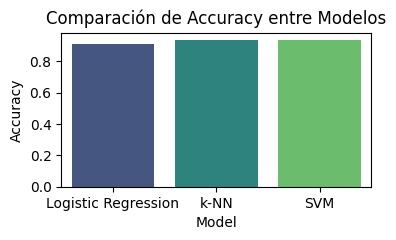

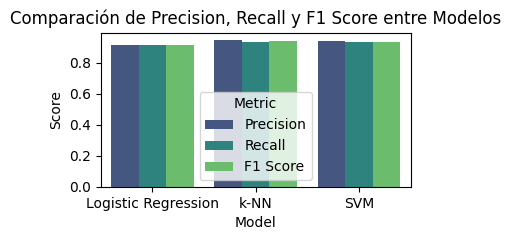

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Guardar métricas en un diccionario
metrics = {
    'Model': ['Logistic Regression', 'k-NN', 'SVM'],
    'Accuracy': [lr_accuracy, knn_accuracy, svm_accuracy],
    'Precision': [lr_precision, knn_precision, svm_precision],
    'Recall': [lr_recall, knn_recall, svm_recall],
    'F1 Score': [lr_f1, knn_f1, svm_f1]
}

# Convertir el diccionario en un DataFrame
metrics_df = pd.DataFrame(metrics)

# Crear una gráfica de barras con Seaborn para Accuracy
plt.figure(figsize=(4, 2))  # Reducir tamaño de la gráfica
sns.barplot(x='Model', y='Accuracy', hue='Model', data=metrics_df, palette='viridis', dodge=False)
plt.title('Comparación de Accuracy entre Modelos')
plt.legend([], [], frameon=False)  # Eliminar leyenda redundante
plt.show()

# Crear una gráfica de barras para Precision, Recall y F1 Score
plt.figure(figsize=(4, 2))  # Reducir tamaño de la gráfica
metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Precision', 'Recall', 'F1 Score'], var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='viridis')
plt.title('Comparación de Precision, Recall y F1 Score entre Modelos')
plt.show()


In [14]:
import joblib
import os

# Supongamos que has decidido usar el modelo SVM como modelo definitivo
final_model = best_model_kNN

# Definir la ruta relativa a partir del directorio actual del notebook
ruta_notebook = os.path.abspath("")

# Crear la ruta hacia la carpeta hermana 'models/output'
ruta_guardado = os.path.abspath(os.path.join(ruta_notebook, "../models/output"))
nombre_archivo = "OperatorsModel.joblib"

# Crear la carpeta si no existe
if not os.path.exists(ruta_guardado):
    os.makedirs(ruta_guardado)

# Crear la ruta completa
ruta_completa = os.path.join(ruta_guardado, nombre_archivo)

# Guardar el modelo en la ruta especificada
joblib.dump(final_model, ruta_completa)

print(f"Modelo guardado en {ruta_completa}")


Modelo guardado en c:\Users\joine\OneDrive\UCV2\SEMESTRE 2-2024\ML\Tareas\Tarea #2\ml-tarea2B-knn-svm\src\notebooks\models\output\OperatorsModel.joblib
